# Least-squares curve fitting

This notebook is demonstrates how to find a least-squares degree n-1 polynomial to m>n noisy (x,y) datapoints, using a Vandermonde matrix,
QR decomposition, and backsubstitution.

### Get some noisy datapoints

In [1]:
using PyPlot

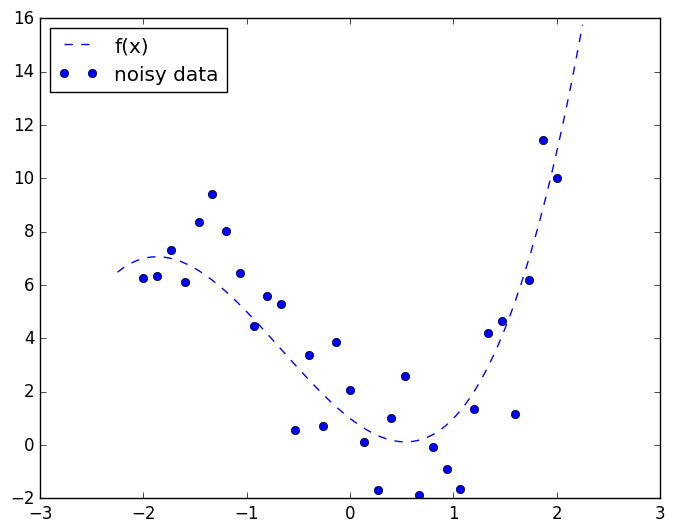

PyObject <matplotlib.legend.Legend object at 0x7fb1854ea890>

In [3]:
# define an underlying functional relation y=f(x)
f(x) = 1 - 3x + 2x.^2 + x.^3

# collect m noisy datapoints, uniformly spaced
m = 31
xdata = linspace(-2,2,m)
ydata = f(xdata) + 2*randn(m)

# plot noisy data and "true" curve
using PyPlot
x = linspace(-2.25, 2.25, 100)
plot(x, f(x), "b--")
plot(xdata, ydata, "bo")
legend(("f(x)", "noisy data"),loc="upper left")

### Fit the noisy datapoints with a polynomial interpolant

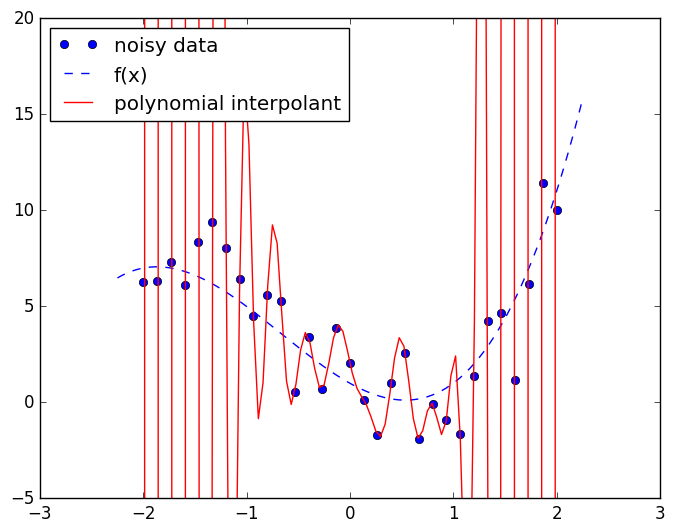

(-5, 20)

In [4]:
# fit m noisy datapoints with an m-1 degree polynomial 
# using Newton Divided Differences

include("polyinterp.jl")
(c,b) = polyinterp(xdata, ydata)

plot(xdata, ydata, "bo")
plot(x, f(x), "b--")
plot(x, polyeval(c,b,x), "r-")
legend(("noisy data", "f(x)", "polynomial interpolant"),loc="upper left")
ylim(-5,20)

### Least-squares curve fit

In [5]:
# Construct m x n Vandermonde matrix for least-squares polynomial 

n = 4              # order of poly fit will be n+1
X = zeros(m,n)
X[:,1] = ones(m)
for j = 2:n
    X[:,j] = X[:,j-1] .* xdata
end

In [6]:
X

31×4 Array{Float64,2}:
 1.0  -2.0       4.0       -8.0     
 1.0  -1.86667   3.48444   -6.5043  
 1.0  -1.73333   3.00444   -5.2077  
 1.0  -1.6       2.56      -4.096   
 1.0  -1.46667   2.15111   -3.15496 
 1.0  -1.33333   1.77778   -2.37037 
 1.0  -1.2       1.44      -1.728   
 1.0  -1.06667   1.13778   -1.21363 
 1.0  -0.933333  0.871111  -0.813037
 1.0  -0.8       0.64      -0.512   
 1.0  -0.666667  0.444444  -0.296296
 1.0  -0.533333  0.284444  -0.151704
 1.0  -0.4       0.16      -0.064   
 ⋮                                  
 1.0   0.533333  0.284444   0.151704
 1.0   0.666667  0.444444   0.296296
 1.0   0.8       0.64       0.512   
 1.0   0.933333  0.871111   0.813037
 1.0   1.06667   1.13778    1.21363 
 1.0   1.2       1.44       1.728   
 1.0   1.33333   1.77778    2.37037 
 1.0   1.46667   2.15111    3.15496 
 1.0   1.6       2.56       4.096   
 1.0   1.73333   3.00444    5.2077  
 1.0   1.86667   3.48444    6.5043  
 1.0   2.0       4.0        8.0     

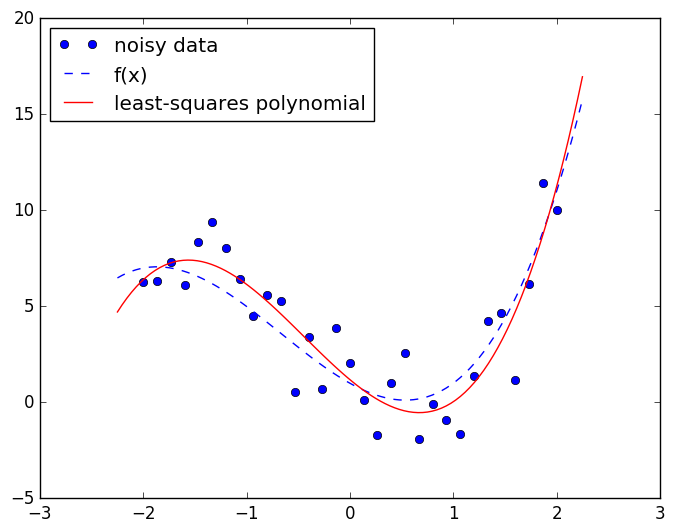

(-5, 20)

In [7]:
# Solve least-squares X c = y problem with QR decomp and backsubstitution
c = X\ydata

# plot data, f(x), and least-squares polynomial fit
plot(xdata, ydata, "bo")
plot(x, f(x), "b--")
plot(x, polyeval(c,x), "r-")
legend(("noisy data", "f(x)", "least-squares polynomial"),loc="upper left")
ylim(-5,20)

In [ ]:
c

In [ ]:
norm(X*c - ydata)

In [ ]:
norm(X*c - ydata)/sqrt(m)